## Overview

The sales prediction dataset comprises historical data on sales transactions, including factors such as date, product type, store location, and sales revenue. With thorough analysis, I am to uncover trends, seasonality, and other patterns within the data to develop predictive models for future sales. By leveraging statistical methods and machine learning algorithms, I am to accurately predict sales, helping businesses optimize inventory management, marketing strategies, and overall performance. This dataset provides valuable insights for businesses aiming to improve their sales forecasting capabilities and maximize profitability.

## Import Libraries and Load Data

In [1]:
# Import libraries

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline
import warnings


df = pd.read_csv('/kaggle/input/sales-prediction-dataset/car_purchasing.csv',encoding='latin-1')

## Data Cleaning and Preparation

In [2]:
df.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [3]:
# Drop 'customer name' and 'customer email' columns

df.drop(columns = ['customer name','customer e-mail'], inplace=True)
df.head()

,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [4]:
# Convert float values to integers 

for col in df.columns:
    if df[col].dtype=='float64':
        df[col]=df[col].astype(int)
        
df.head()

,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Bulgaria,0,41,62812,11609,238961,35321
1,Belize,0,40,66646,9572,530973,45115
2,Algeria,1,43,53798,11160,638467,42925
3,Cook Islands,1,58,79370,14426,548599,67422
4,Brazil,1,57,59729,5358,560304,55915


In [5]:
# Check for missing values

df.isna().sum()

country                0
gender                 0
age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64

In [6]:
# Check for duplicates 

df.duplicated().sum()

0

## Data Analysis

In [7]:
# Get info 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   country              500 non-null    object
 1   gender               500 non-null    int64 
 2   age                  500 non-null    int64 
 3   annual Salary        500 non-null    int64 
 4   credit card debt     500 non-null    int64 
 5   net worth            500 non-null    int64 
 6   car purchase amount  500 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 27.5+ KB


In [8]:
df.shape

(500, 7)

<Axes: xlabel='country'>

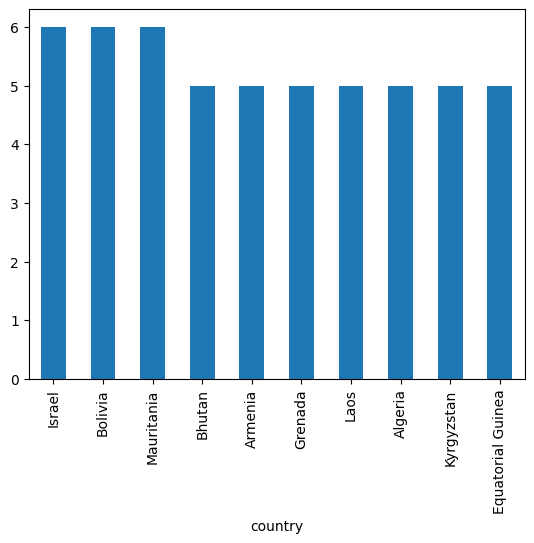

In [9]:
# Sort countrys by value 

df['country'].value_counts().sort_values(ascending=False).head(10).plot(kind="bar")

<Axes: ylabel='count'>

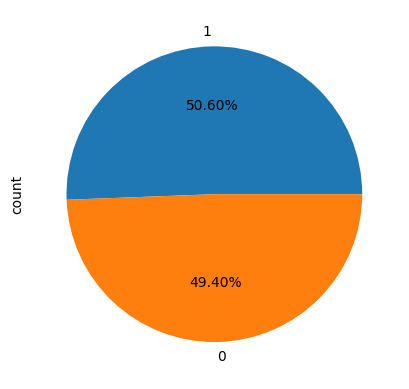

In [10]:
# Analyze gender distribution 
df['gender'].value_counts().plot(kind='pie',autopct='%.2f%%')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='annual Salary', ylabel='Count'>

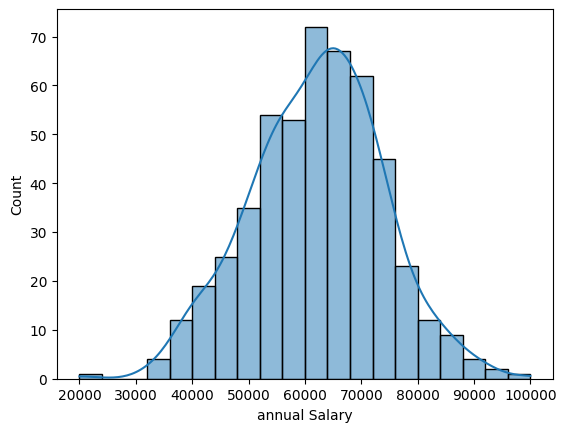

In [11]:
# Plot annual salary distribution (histplot)

sns.histplot(data=df, x='annual Salary', kde=True, bins=20)

In [12]:
df['annual Salary'].describe()

count       500.000000
mean      62126.748000
std       11703.393848
min       20000.000000
25%       54391.750000
50%       62915.000000
75%       70117.250000
max      100000.000000
Name: annual Salary, dtype: float64

<Axes: >

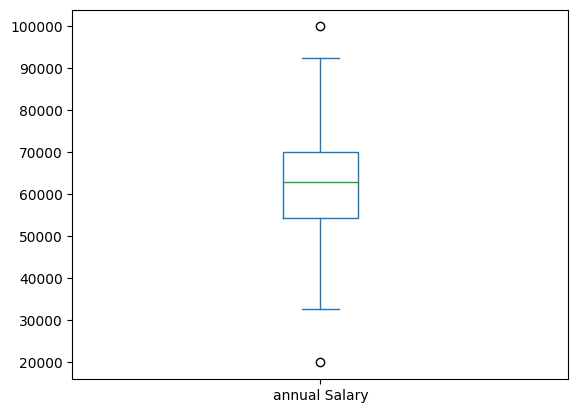

In [13]:
# Box plot for annual salary

df['annual Salary'].plot(kind='box')

<Axes: xlabel='gender'>

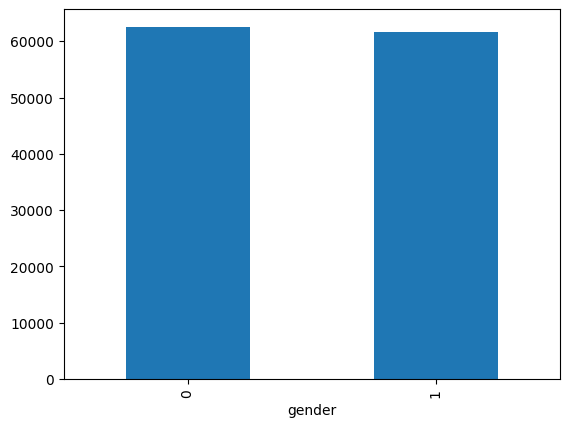

In [14]:
# Bar plot visualization of 'gender' and 'annual Salary' distribution 

df.groupby('gender')['annual Salary'].mean().plot(kind='bar')

Males earn slightly more than females.

<Axes: xlabel='age'>

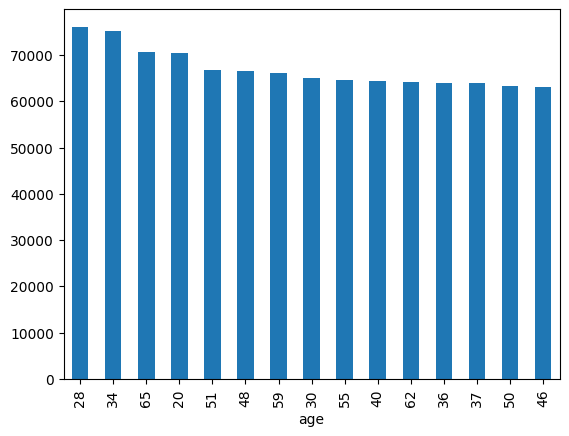

In [15]:
# Bar plot 'age' vs 'annual Salary' find the top 15 ages with the highest salary 

df.groupby('age')['annual Salary'].mean().sort_values(ascending=False).head(15).plot(kind='bar')


<Axes: xlabel='age'>

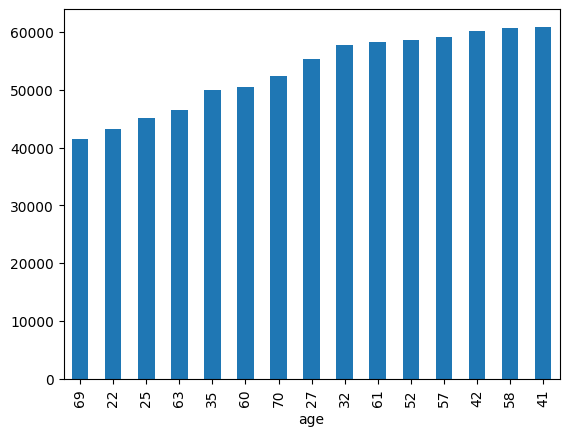

In [16]:
# Visualization for the ages that make the 15 lowest annual salary 

df.groupby('age')['annual Salary'].mean().sort_values().head(15).plot(kind='bar')

<Axes: xlabel='country'>

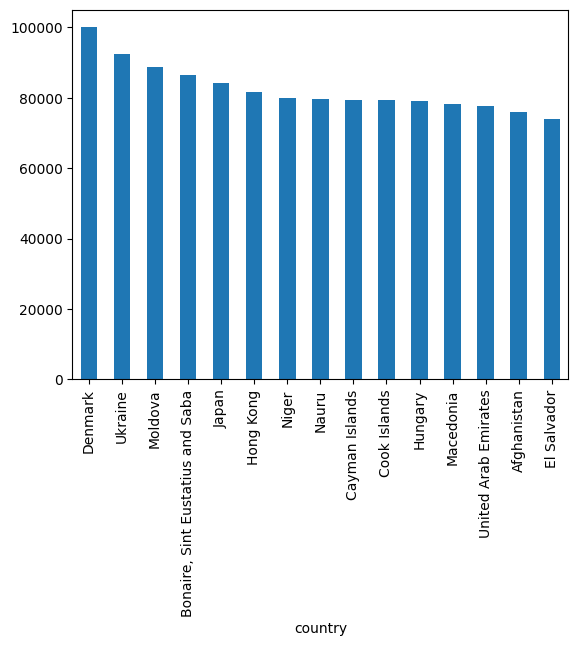

In [17]:
# Visualization for 'country' vs 'annual Salary' - bar plot top 15 countries

df.groupby('country')['annual Salary'].mean().sort_values(ascending=False).head(15).plot(kind='bar')

People in Denmark earn the most in annual salary.

<Axes: xlabel='country'>

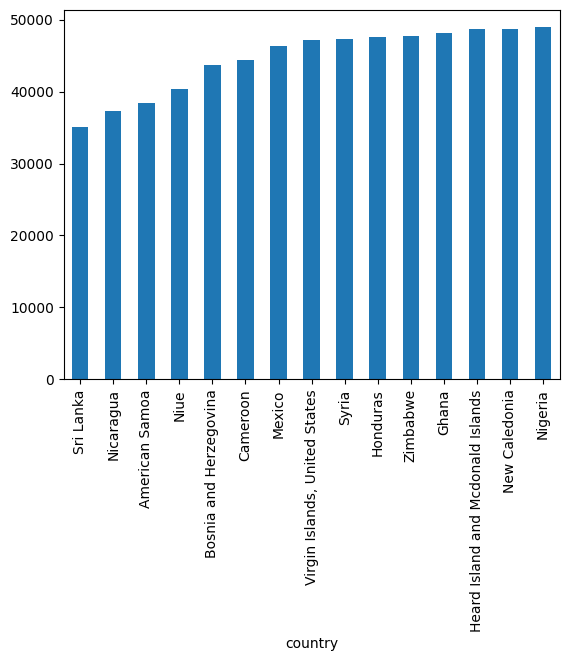

In [18]:
# 15 countries with the lowest annual salary 

df.groupby('country')['annual Salary'].mean().sort_values().head(15).plot(kind='bar')

Individuals in Sri Lanka earn the lowest annual salaries.

In [19]:
df.head()

,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Bulgaria,0,41,62812,11609,238961,35321
1,Belize,0,40,66646,9572,530973,45115
2,Algeria,1,43,53798,11160,638467,42925
3,Cook Islands,1,58,79370,14426,548599,67422
4,Brazil,1,57,59729,5358,560304,55915


<Axes: xlabel='gender'>

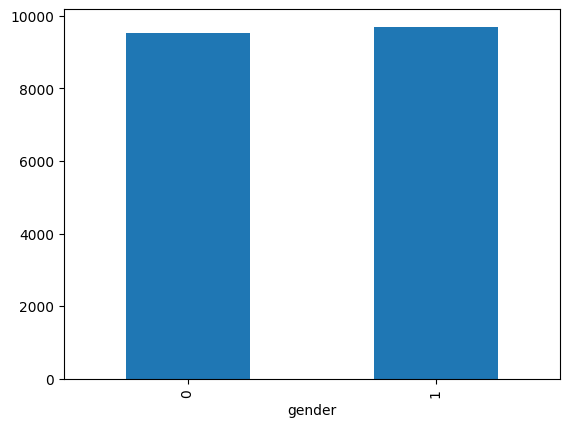

In [20]:
# Bar plot 'gender' vs 'credit card debt'

df.groupby('gender')['credit card debt'].mean().plot(kind='bar')

<Axes: xlabel='annual Salary', ylabel='credit card debt'>

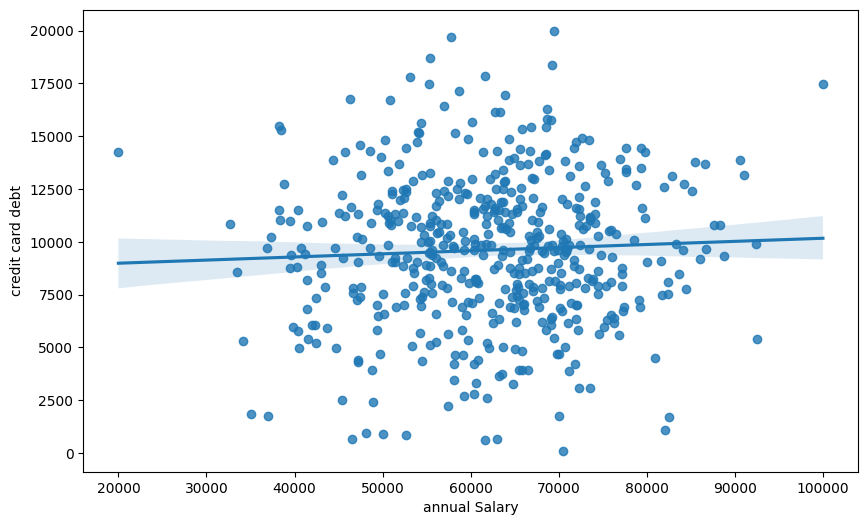

In [21]:
# Regression Plot 'annual Salary' vs 'credit card debt'

plt.figure(figsize=(10,6))
sns.regplot(data=df,x='annual Salary',y='credit card debt')

<Axes: xlabel='annual Salary', ylabel='net worth'>

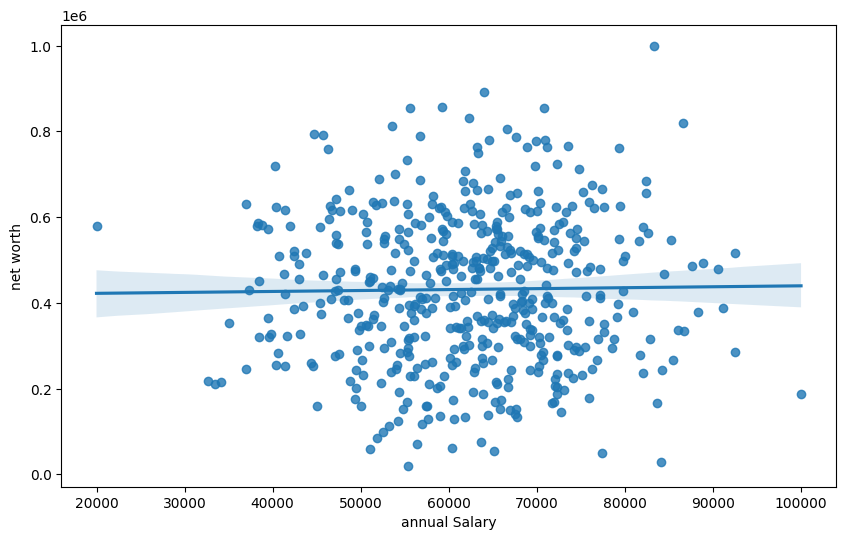

In [22]:
# Regression plot 'annual Salary' vs 'net worth'

plt.figure(figsize=(10,6))
sns.regplot(data=df,x='annual Salary',y='net worth')

In [23]:
# Get summary of 'car purchase amount'

df['car purchase amount'].describe()

count      500.000000
mean     44209.292000
std      10773.182684
min       9000.000000
25%      37629.500000
50%      43997.500000
75%      51254.500000
max      80000.000000
Name: car purchase amount, dtype: float64

<Axes: xlabel='gender'>

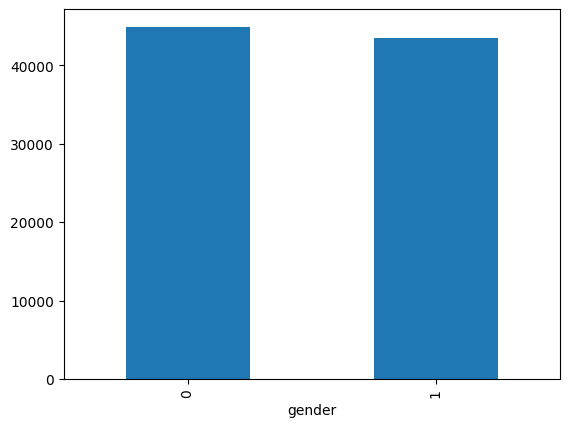

In [24]:
# Visualization for 'gender' vs 'car purchase amount' bar plot

df.groupby('gender')['car purchase amount'].mean().plot(kind="bar")

<Axes: xlabel='annual Salary', ylabel='car purchase amount'>

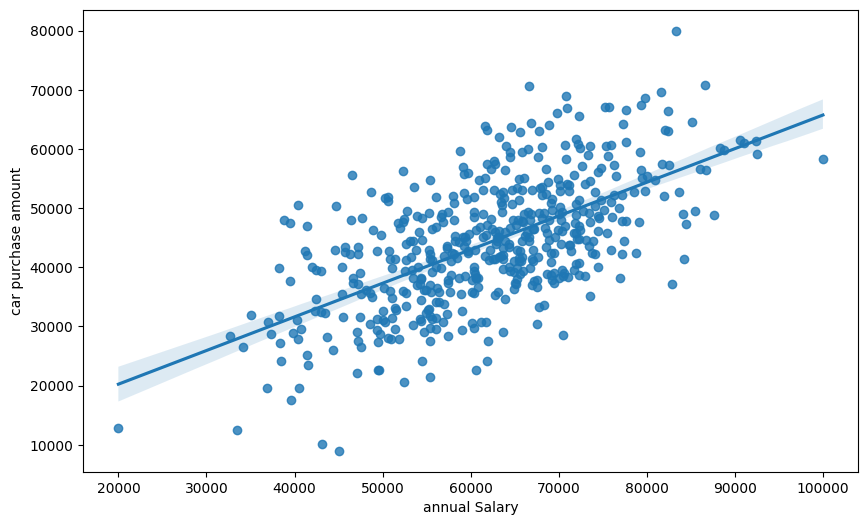

In [25]:
# Regplot 'annual Salary' vs 'car purchase amount'

plt.figure(figsize=(10,6))
sns.regplot(data=df,x='annual Salary',y='car purchase amount')

Individuals with high incomes are more likely to purchase more expensive cars.

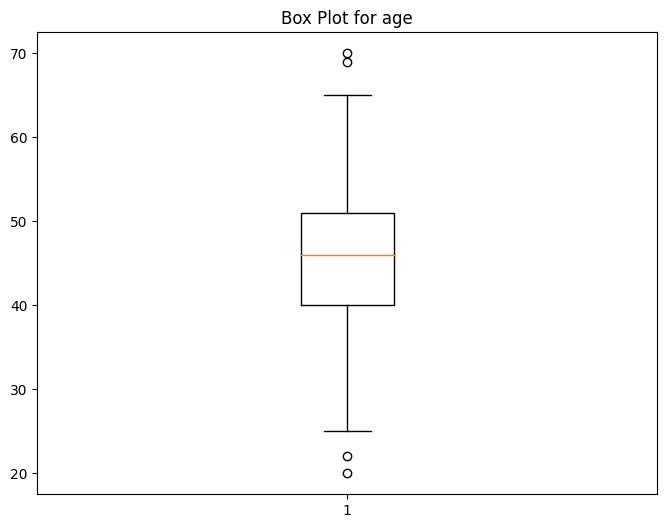

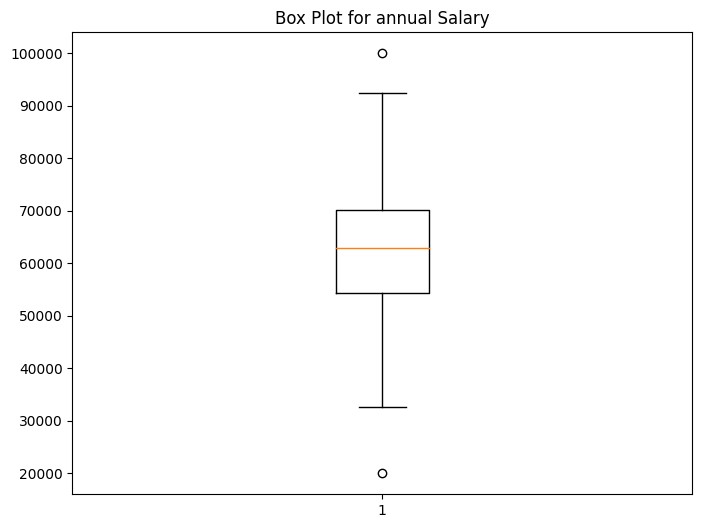

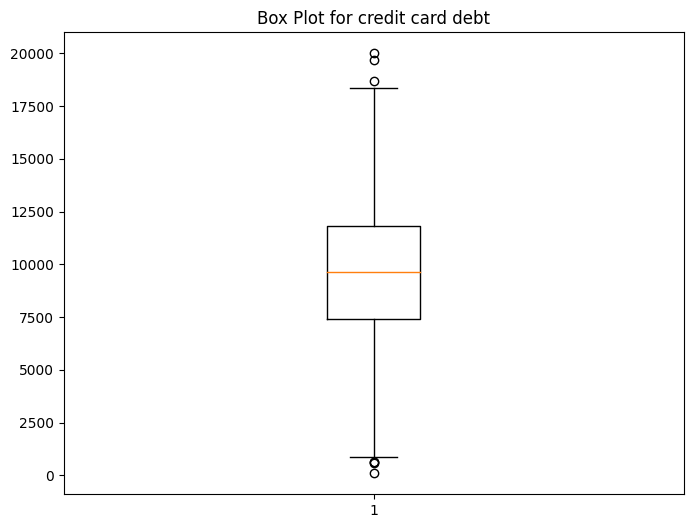

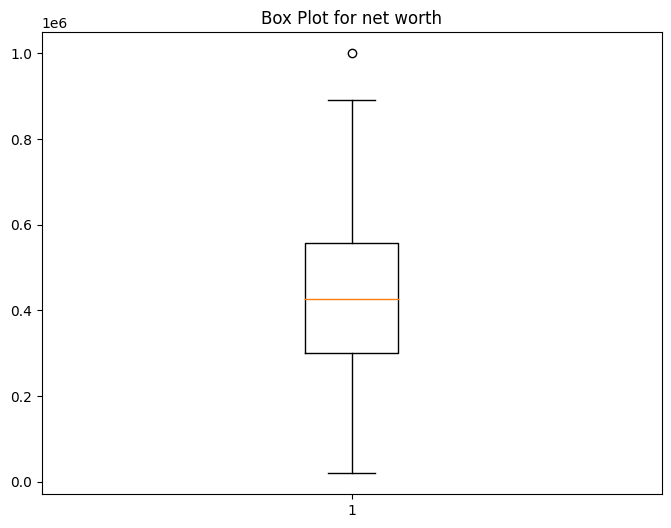

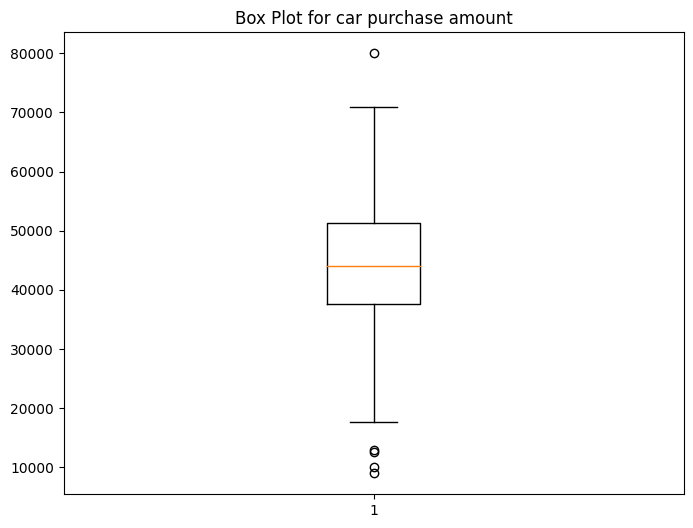

In [26]:
# Box plot of visual representation of distribution in each column 

columns_to_plot = ['age','annual Salary','credit card debt','net worth','car purchase amount']

# Create separate box plots for each column 

for col in columns_to_plot:
    plt.figure(figsize=(8,6))
    plt.boxplot(df[col])
    plt.title(f'Box Plot for {col}')

Text(0.5, 1.0, 'Correlation Heat Map')

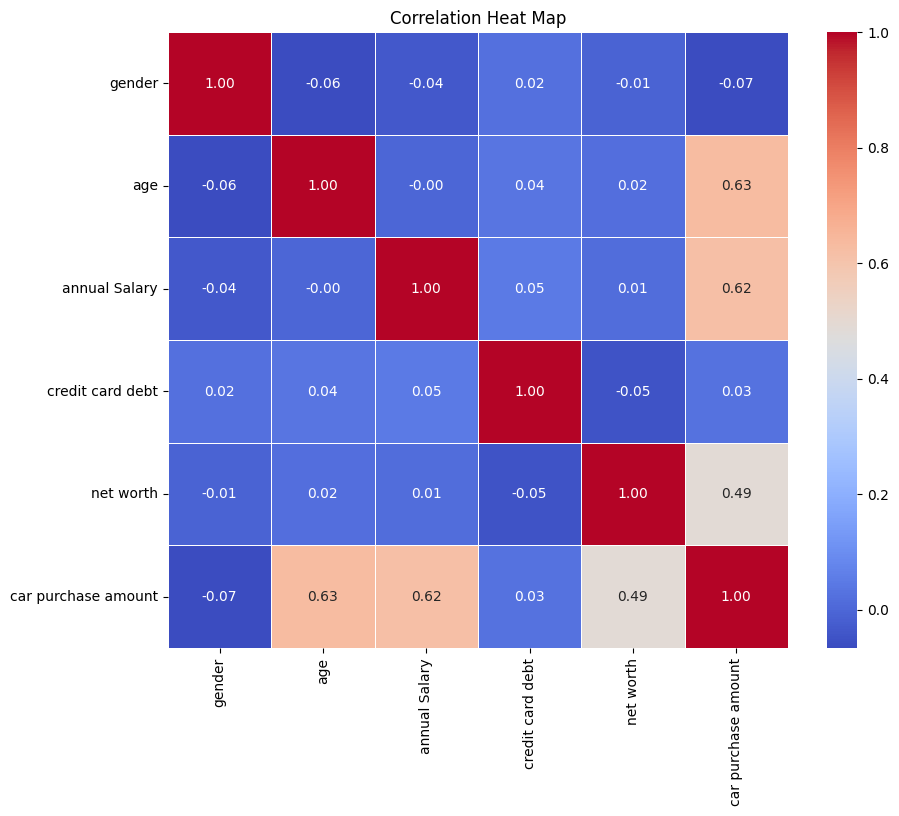

In [27]:
# Correlation heat map 

plt.figure(figsize=(10,8))
num_cols = df.select_dtypes('int','float')
heatmap = sns.heatmap(num_cols.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths = .5)
heatmap.set_title('Correlation Heat Map')

In [28]:
df.head()

,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Bulgaria,0,41,62812,11609,238961,35321
1,Belize,0,40,66646,9572,530973,45115
2,Algeria,1,43,53798,11160,638467,42925
3,Cook Islands,1,58,79370,14426,548599,67422
4,Brazil,1,57,59729,5358,560304,55915


## Model Building and Evaluation

### Encoding

In [29]:
# location_freq refers to how often a country appears in the dataset
location_freq = df['country'].value_counts(normalize=True).to_dict()
df['country'] = df['country'].map(location_freq)

In [30]:
df.head()

,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,0.004,0,41,62812,11609,238961,35321
1,0.006,0,40,66646,9572,530973,45115
2,0.010,1,43,53798,11160,638467,42925
3,0.002,1,58,79370,14426,548599,67422
4,0.006,1,57,59729,5358,560304,55915


### Normalization

In [31]:
def normalize_columns(df, columns):
    for col in columns:
        min_val = df[col].min()
        max_val = df[col].max()
        df[col] = (df[col] - min_val) / (max_val - min_val)
        
columns_to_normalize = ['age','annual Salary','credit card debt','net worth']

normalize_columns(df,columns_to_normalize)

In [32]:
df.head()

,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,0.004,0,0.42,0.535150,0.578342,0.223430,35321
1,0.006,0,0.40,0.583075,0.475980,0.521401,45115
2,0.010,1,0.46,0.422475,0.555779,0.631089,42925
3,0.002,1,0.76,0.742125,0.719899,0.539387,67422
4,0.006,1,0.74,0.496613,0.264221,0.551331,55915


In [33]:
df.isna().sum()

country                0
gender                 0
age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64

### Import Libraries Needed for Model

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR

Linear Regression:
  - Mean Squared Error (MSE): 59912.78431342437
  - Mean Absolute Error (MAE): 208.00540107233
  - Root Mean Squared Error (RMSE): 244.7708812612815
  - R Squared (R2): 0.9994451124203982


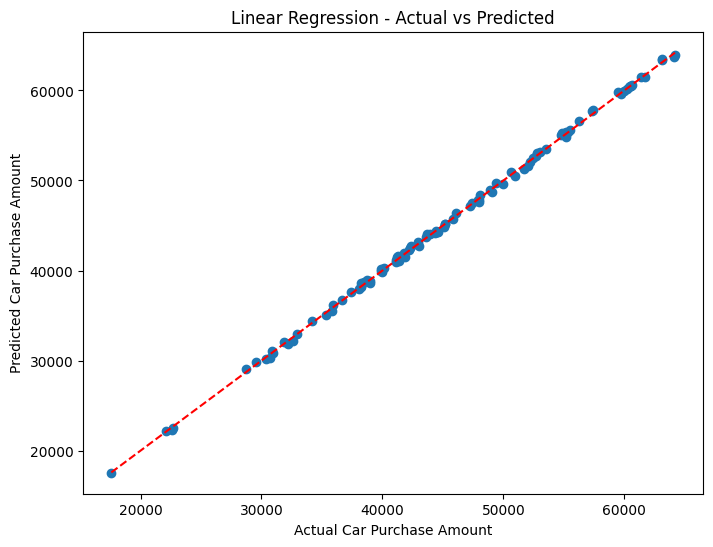

Ridge Regression:
  - Mean Squared Error (MSE): 918705.8040007523
  - Mean Absolute Error (MAE): 780.9218101863216
  - Root Mean Squared Error (RMSE): 958.491420932265
  - R Squared (R2): 0.9914913245012736


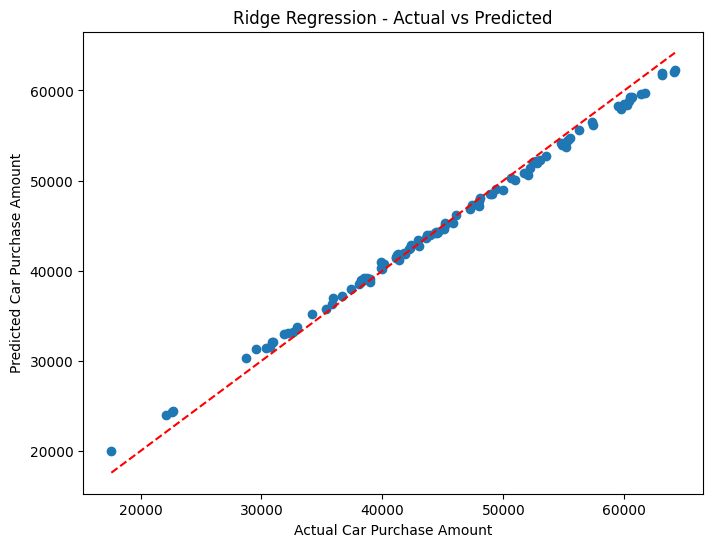

Lasso Regression:
  - Mean Squared Error (MSE): 60177.20865364287
  - Mean Absolute Error (MAE): 210.56882290718787
  - Root Mean Squared Error (RMSE): 245.31043323438746
  - R Squared (R2): 0.9994426634308576


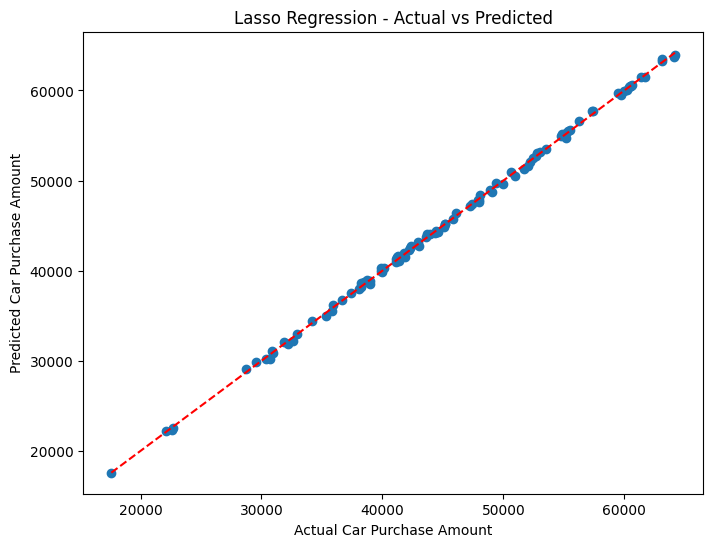

Random Forest:
  - Mean Squared Error (MSE): 5562999.484746997
  - Mean Absolute Error (MAE): 1646.6598999999999
  - Root Mean Squared Error (RMSE): 2358.6011711917295
  - R Squared (R2): 0.9484777855879799


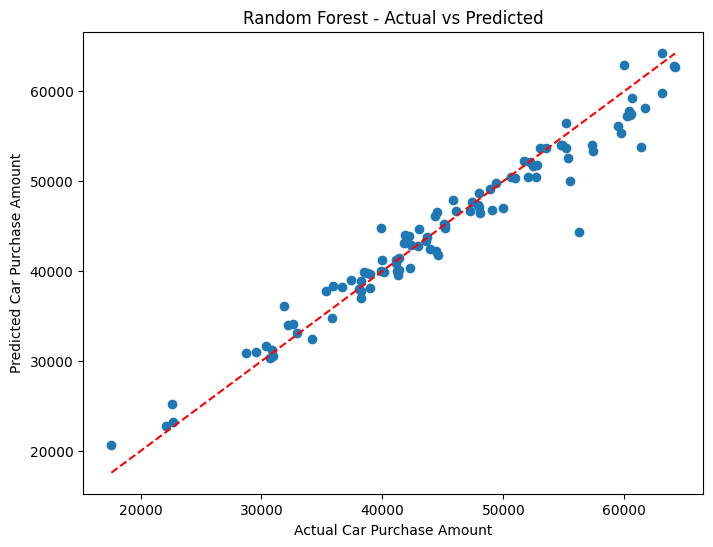

Decision Tree:
  - Mean Squared Error (MSE): 12782625.47
  - Mean Absolute Error (MAE): 2826.05
  - Root Mean Squared Error (RMSE): 3575.2797750665613
  - R Squared (R2): 0.8816125775277073


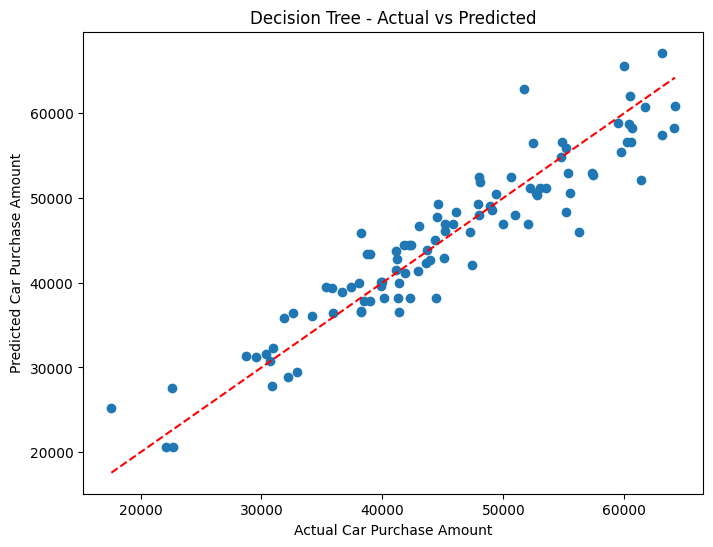

Support Vector Machine:
  - Mean Squared Error (MSE): 109657066.67718275
  - Mean Absolute Error (MAE): 8419.852008309592
  - Root Mean Squared Error (RMSE): 10471.727015023966
  - R Squared (R2): -0.015598674173155747


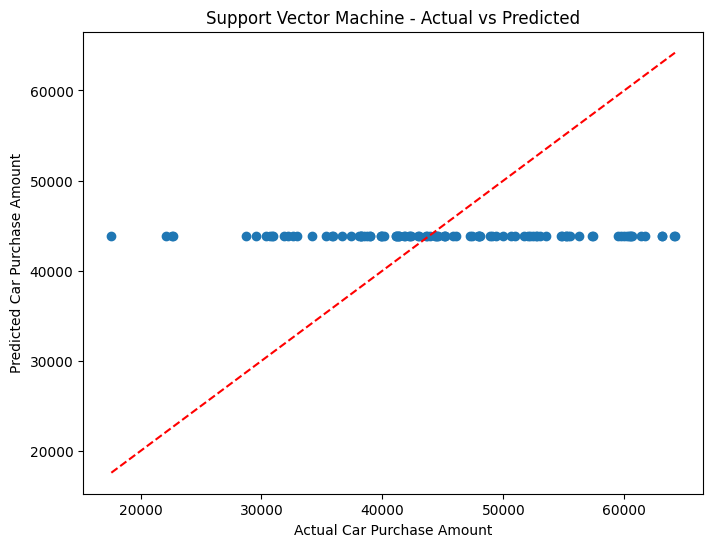

XGBoost:
  - Mean Squared Error (MSE): 6023661.071220216
  - Mean Absolute Error (MAE): 1820.043291015625
  - Root Mean Squared Error (RMSE): 2454.3147864974894
  - R Squared (R2): 0.944211327340998


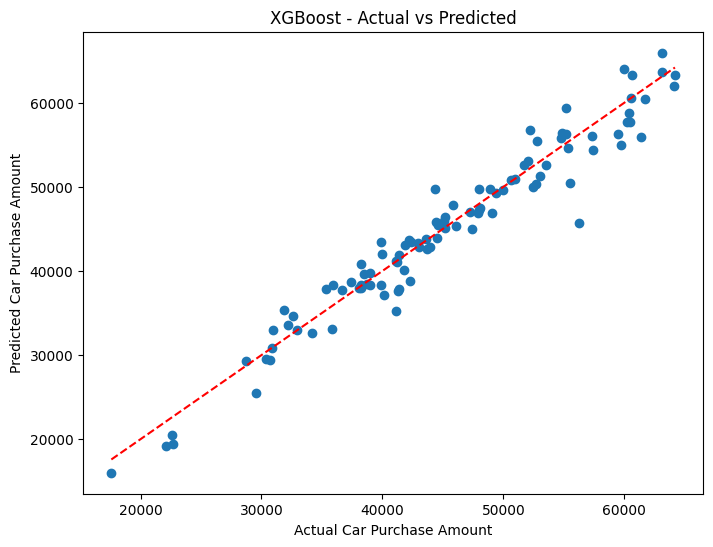

In [35]:
x = df.drop('car purchase amount', axis=1)
y = df['car purchase amount']

X_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Support Vector Machine': SVR(),
    'XGBoost': XGBRegressor(random_state=42)
}

for name, model in models.items():
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(x_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    print(f"{name}:")
    print(f"  - Mean Squared Error (MSE): {mse}")
    print(f"  - Mean Absolute Error (MAE): {mae}")
    print(f"  - Root Mean Squared Error (RMSE): {rmse}")
    print(f"  - R Squared (R2): {r2}")

    # Plot actual vs predicted 
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
    plt.xlabel('Actual Car Purchase Amount')
    plt.ylabel('Predicted Car Purchase Amount')
    plt.title(f'{name} - Actual vs Predicted')
    plt.show()